In [1]:
from HARK.utilities import plot_funcs
from time import process_time
import matplotlib.pyplot as plt
import numpy as np
from HARK.ConsumptionSaving.ConsGenIncProcessModel import (
    IndShockExplicitPermIncConsumerType,
    IndShockConsumerType,
    PersistentShockConsumerType,
    init_explicit_perm_inc,
)


def mystr(number):
    return "{:.4f}".format(number)

In [2]:
do_simulation = True

In [3]:
# Display information about the pLvlGrid used in these examples
print(
    "The infinite horizon examples presented here use a grid of persistent income levels (pLvlGrid)"
)
print(
    "based on percentiles of the long run distribution of pLvl for the given parameters. These percentiles"
)
print(
    "are specified in the attribute pLvlPctiles. Here, the lowest percentile is "
    + str(init_explicit_perm_inc["pLvlPctiles"][0] * 100)
    + " and the highest"
)
print("percentile is " + str(init_explicit_perm_inc["pLvlPctiles"][-1] * 100) + ".\n")

The infinite horizon examples presented here use a grid of persistent income levels (pLvlGrid)
based on percentiles of the long run distribution of pLvl for the given parameters. These percentiles
are specified in the attribute pLvlPctiles. Here, the lowest percentile is 0.1 and the highest
percentile is 99.9.



In [4]:
# Make and solve an example "explicit permanent income" consumer with idiosyncratic shocks
ExplicitExample = IndShockExplicitPermIncConsumerType()
t_start = process_time()
ExplicitExample.solve()
t_end = process_time()
print(
    "Solving an explicit permanent income consumer took "
    + mystr(t_end - t_start)
    + " seconds."
)

Solving an explicit permanent income consumer took 13.1042 seconds.


Consumption function by pLvl for explicit permanent income consumer:


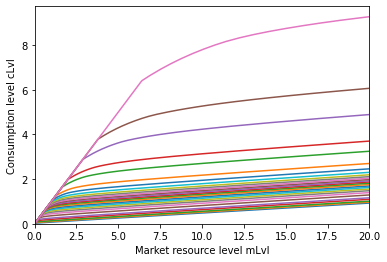

In [5]:
# Plot the consumption function at various permanent income levels
print("Consumption function by pLvl for explicit permanent income consumer:")
pLvlGrid = ExplicitExample.pLvlGrid[0]
mLvlGrid = np.linspace(0, 20, 300)
for p in pLvlGrid:
    M_temp = mLvlGrid + ExplicitExample.solution[0].mLvlMin(p)
    C = ExplicitExample.solution[0].cFunc(M_temp, p * np.ones_like(M_temp))
    plt.plot(M_temp, C)
plt.xlim(0.0, 20.0)
plt.ylim(0.0, None)
plt.xlabel("Market resource level mLvl")
plt.ylabel("Consumption level cLvl")
plt.show()

In [6]:
# Now solve the *exact same* problem, but with the permanent income normalization
NormalizedExample = IndShockConsumerType(**init_explicit_perm_inc)
NormalizedExample.cycles = 0
t_start = process_time()
NormalizedExample.solve()
t_end = process_time()
print(
    "Solving the equivalent problem with permanent income normalized out took "
    + mystr(t_end - t_start)
    + " seconds."
)

GPFRaw           = 0.994384 
GPFNrm           = 1.003715 
GPFAggMort       = 0.974497 
Thorn = APF      = 0.994384 
PermGroFacAdj    = 0.990704 
uInvEpShkuInv    = 0.990704 
VAF             = 0.932054 
WRPF             = 0.213705 
DiscFacGPFNrmMax = 0.952907 
DiscFacGPFAggMortMax = 0.990688 


Solving the equivalent problem with permanent income normalized out took 1.9983 seconds.


Normalized consumption function by pLvl for explicit permanent income consumer:


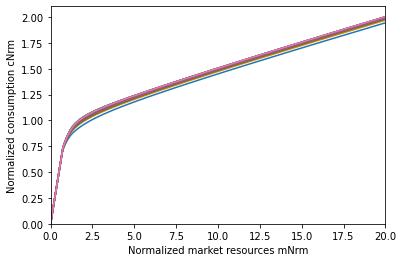

Consumption function for normalized problem (without explicit permanent income):


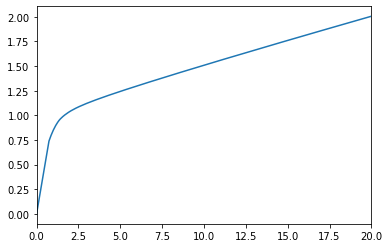

In [7]:
# Show that the normalized consumption function for the "explicit permanent income" consumer
# is almost identical for every permanent income level (and the same as the normalized problem's
# cFunc), but is less accurate due to extrapolation outside the bounds of pLvlGrid.
print("Normalized consumption function by pLvl for explicit permanent income consumer:")
pLvlGrid = ExplicitExample.pLvlGrid[0]
mNrmGrid = np.linspace(0, 20, 300)
for p in pLvlGrid:
    M_temp = mNrmGrid * p + ExplicitExample.solution[0].mLvlMin(p)
    C = ExplicitExample.solution[0].cFunc(M_temp, p * np.ones_like(M_temp))
    plt.plot(M_temp / p, C / p)
plt.xlim(0.0, 20.0)
plt.ylim(0.0, None)
plt.xlabel("Normalized market resources mNrm")
plt.ylabel("Normalized consumption cNrm")
plt.show()
print(
    "Consumption function for normalized problem (without explicit permanent income):"
)
mNrmMin = NormalizedExample.solution[0].mNrmMin
plot_funcs(NormalizedExample.solution[0].cFunc, mNrmMin, mNrmMin + 20)

The "explicit permanent income" solution deviates from the solution to the normalized problem because
of errors from extrapolating beyond the bounds of the pLvlGrid.
The error is largest for pLvl values
near the upper and lower bounds, and propagates toward the center of the distribution.

In [8]:
# Plot the value function at various permanent income levels
if ExplicitExample.vFuncBool:
    pGrid = np.linspace(0.1, 3.0, 24)
    M = np.linspace(0.001, 5, 300)
    for p in pGrid:
        M_temp = M + ExplicitExample.solution[0].mLvlMin(p)
        C = ExplicitExample.solution[0].vFunc(M_temp, p * np.ones_like(M_temp))
        plt.plot(M_temp, C)
    plt.ylim([-200, 0])
    plt.xlabel("Market resource level mLvl")
    plt.ylabel("Value v")
    plt.show()

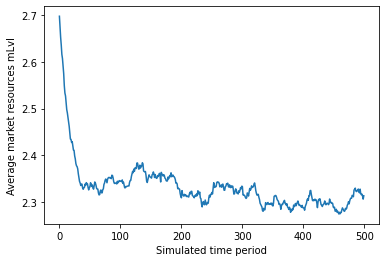

In [9]:
# Simulate some data
if do_simulation:
    ExplicitExample.T_sim = 500
    ExplicitExample.track_vars = ["mLvl", "cLvl", "pLvl"]
    ExplicitExample.make_shock_history()  # This is optional
    ExplicitExample.initialize_sim()
    ExplicitExample.simulate()
    plt.plot(np.mean(ExplicitExample.history["mLvl"], axis=1))
    plt.xlabel("Simulated time period")
    plt.ylabel("Average market resources mLvl")
    plt.show()

In [10]:
# Make and solve an example "persistent idisyncratic shocks" consumer
PersistentExample = PersistentShockConsumerType()
t_start = process_time()
PersistentExample.solve()
t_end = process_time()
print(
    "Solving a persistent income shocks consumer took "
    + mystr(t_end - t_start)
    + " seconds."
)

Solving a persistent income shocks consumer took 11.1584 seconds.


Consumption function by persistent income level pLvl for a consumer with AR1 coefficient of 0.98:


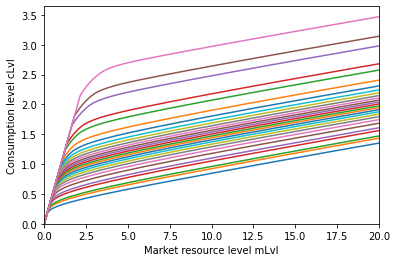

In [11]:
# Plot the consumption function at various levels of persistent income pLvl
print(
    "Consumption function by persistent income level pLvl for a consumer with AR1 coefficient of "
    + str(PersistentExample.PrstIncCorr)
    + ":"
)
pLvlGrid = PersistentExample.pLvlGrid[0]
mLvlGrid = np.linspace(0, 20, 300)
for p in pLvlGrid:
    M_temp = mLvlGrid + PersistentExample.solution[0].mLvlMin(p)
    C = PersistentExample.solution[0].cFunc(M_temp, p * np.ones_like(M_temp))
    plt.plot(M_temp, C)
plt.xlim(0.0, 20.0)
plt.ylim(0.0, None)
plt.xlabel("Market resource level mLvl")
plt.ylabel("Consumption level cLvl")
plt.show()

In [12]:
# Plot the value function at various persistent income levels
if PersistentExample.vFuncBool:
    pGrid = PersistentExample.pLvlGrid[0]
    M = np.linspace(0.001, 5, 300)
    for p in pGrid:
        M_temp = M + PersistentExample.solution[0].mLvlMin(p)
        C = PersistentExample.solution[0].vFunc(M_temp, p * np.ones_like(M_temp))
        plt.plot(M_temp, C)
    plt.ylim([-200, 0])
    plt.xlabel("Market resource level mLvl")
    plt.ylabel("Value v")
    plt.show()

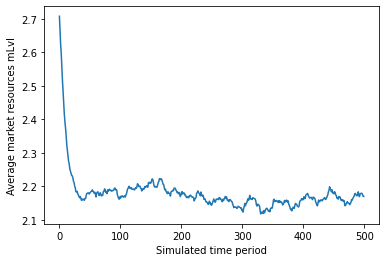

In [14]:
# Simulate some data
if do_simulation:
    PersistentExample.T_sim = 500
    PersistentExample.track_vars = ["mLvl", "cLvl", "pLvl"]
    PersistentExample.initialize_sim()
    PersistentExample.simulate()
    plt.plot(np.mean(PersistentExample.history["mLvl"], axis=1))
    plt.xlabel("Simulated time period")
    plt.ylabel("Average market resources mLvl")
    plt.show()